In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from functools import reduce

In [9]:
def assemble_font(x, y, fontsize, show=True):
    font = ImageFont.truetype(
        "/Users/paul/Downloads/OnlineWebFonts_COM_11a0aee1e7dcd2d5479ba925152dadee/MonoLisa_Regular/MonoLisa_Regular.ttf",
        fontsize
    )
    ret = []
    for i in range(256):
        image = Image.new('1', (x, y), color=1)
        draw = ImageDraw.Draw(image)
        draw.text((1,0),chr(i),font=font, fill='black')
        ret.append(np.array(image))
    
    if show:
        show_font(ret)
            
    return ret

In [25]:
def show_font(font):
    y, x = font[0].shape
    print(x, y)
    h, v = 32, 8
    container = np.zeros((v*y+v-1, h*x+h-1), dtype=bool)
    print(container.shape)

    for i in range(v):
        for j in range(h):
            x0, y0, x1, y1 = (j*x+j, i*y+i, j*x+x+j, i*y+y+i)
#             print(i*h+j, x0,y0,x1,y1)
#             display(Image.fromarray(font[i*h+j]))
            container[y0:y1,x0:x1] = font[i*h+j]
            
    display(Image.fromarray(container))

In [67]:
def font_to_hex(font):
    font_as_hex = []
    for i,c in enumerate(font):
        c = np.rot90(c)
        c = c.flatten()
        hex_values = []
        byte_splits = np.split(c, len(c)//8)
        for b in byte_splits:
            b = np.asarray(b, dtype=int)
            b = reduce(lambda a, b: a + str(b), b, '')
            hex_values.append(hex(int(b, 2)))
        font_as_hex.append(hex_values)
    return np.asarray(font_as_hex)


In [72]:
def font_to_file(filename, hex_font, width, height):
    with open(filename, 'w') as file:
        file.write(f'extern const unsigned char font_{width}_{height}[256][{len(hex_font[0])}] PROGMEM = ' + '{\n')
        for c in hex_font:
            file.write('{' + ', '.join(c) + ' },')
        file.write('}')

32 48
(391, 1055)


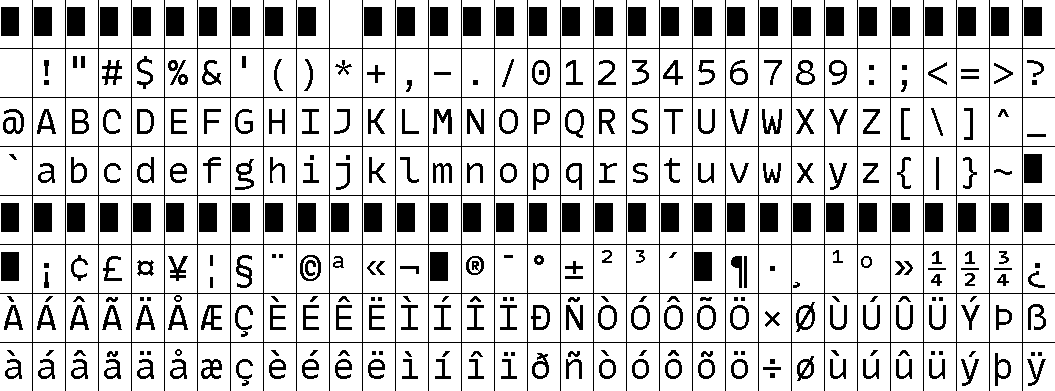

In [13]:
fonts = assemble_font(32, 48, 36)

16 24
(199, 543)


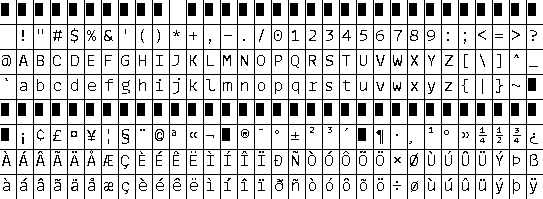

In [15]:
fonts = assemble_font(16, 24, 16)

In [18]:
hf = font_to_hex(fonts)

In [222]:
font_to_file('test.c', 32, 48)

In [210]:
len(fonts)

256

16 24
(199, 543)


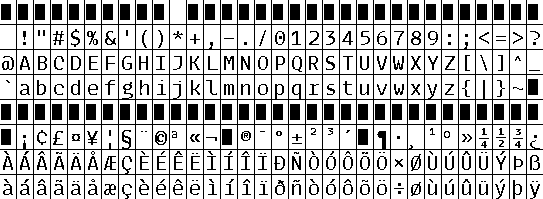

In [241]:
fonts = assemble_font(16, 24, 20)
hf = font_to_hex(fonts)
font_to_file('test.c', hf, 16, 24)

In [46]:
icons = [
    '/Users/paul/Downloads/pixel-40x40-6.png',
    '/Users/paul/Downloads/pixel-40x40-7.png',
    '/Users/paul/Downloads/pixel-40x40-8.png',
    '/Users/paul/Downloads/pixel-40x40-9.png',
    '/Users/paul/Downloads/pixel-40x40-10.png',
]
icons = [ Image.open(x) for x in icons] 

In [48]:
icons = [np.array(x)[:,:,(2,3)] for x in icons]

In [49]:
icons[0][:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

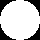

In [54]:
Image.fromarray(icons[0][:,:,1])

In [69]:
bw_icons = [
    (~i[:,:,1] + i[:,:,0])//255
    for i in icons
]

In [70]:
hex_icons = font_to_hex(bw_icons)

In [73]:
font_to_file('icons.c', hex_icons, 40, 40)